# Spotify Analysis

## Data preparation: cleaning and shaping

• find all the missing values.
• renaming some columns
• change values in column 'Genre'
• convert column Length(duration) from object to int type
• convert all the negative values in column 'loudness' to the positive
• grouping data by columns


In [44]:
# importing useful packages
import numpy as np
import pandas as pd
import os
import csv
import random
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# making data frame from csv file  and making the index from column "Index"
top = pd.read_csv('Spotify-2000.csv',delimiter = ",",
             encoding = "utf - 8", doublequote=True)
top.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [46]:
#show size of table- in rows and columns
top.shape

(1994, 15)

In [5]:
#showing all info about columns
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null object
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(11), object(4)
memory usage: 233.8+ KB


In [6]:
#counting types of columns
top.dtypes.value_counts()

int64     11
object     4
dtype: int64

In [7]:
# get all the statistical derscription of numerical columns
top.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [8]:
#finding missing values on each column
top.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [9]:
#finding duplicated records in dataset
top.duplicated().sum()

0

In [10]:
#renaming columns
top1 = top.rename(columns={"Length (Duration)": "Duration (sec)"})
top1.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [11]:
#so , because we find no missing values, next we are going to modificate our data.
#in this step, we will change type and values in column "Length(Duration)"
top1['Duration (sec)'].dtype

dtype('O')

In [12]:
#replacing comma from numbers that make them string values by using replace() method
#and convert into integer by using to_numeric and apply methods
top1.replace(',','', regex=True, inplace=True)
top1['Duration (sec)']= top1['Duration (sec)'].apply(pd.to_numeric,errors='coerce')
top1['Duration (sec)'].dtype

dtype('int64')

In [13]:
#show the results
top1['Duration (sec)']

0       201
1       207
2       341
3       269
4       256
       ... 
1989    128
1990    136
1991    162
1992    324
1993    148
Name: Duration (sec), Length: 1994, dtype: int64

In [14]:
#describing the statistical part of column
top1['Duration (sec)'].describe()

count    1994.000000
mean      262.443330
std        93.604387
min        93.000000
25%       212.000000
50%       245.000000
75%       289.000000
max      1412.000000
Name: Duration (sec), dtype: float64

In [15]:
#change the column name of Top Genre
top1.rename(columns = {'Top Genre' : 'Genre'}, inplace = True)
top1.head()

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [16]:
#merging similar genres to the one general
#conert all value's lettercases to lower
genre = (top1["Genre"].str.strip()).str.lower()
top1.head(3)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [17]:
# function to split the genre column
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')
#loop until the genre cannot be split any further
genre_m1 = genre.copy()
while(max((genre_m1.str.split(" ", 1)).str.len()) > 1):
    genre_m1 = genre_splitter(genre_m1)
len(genre_m1.unique())

68

In [18]:
genre_m1.value_counts()

rock           856
pop            333
standards      123
metal           93
indie           77
              ... 
trance           1
motown           1
alternative      1
soundtrack       1
electronica      1
Name: Genre, Length: 68, dtype: int64

In [19]:
#changing the column values to the results
top1['Genre'] = genre_m1
top1.head(5)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59


In [20]:
#convert negative values in "Loudness " column to positive by using abs() function
top1['Loudness (dB)'] = top1['Loudness (dB)'].abs()
top1.head(5)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,rock,2000,135,79,50,11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,hop,2001,168,69,66,9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,5,10,87,256,1,3,59


In [21]:
#next, we'll define how many artists participate in our research and how many songs of these artists are in this dataset
top1['Artist'].value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
The Buoys              1
Art Garfunkel          1
Robert Plant           1
Steely Dan             1
The Cult               1
Name: Artist, Length: 731, dtype: int64

In [22]:
#sorting songs from most to less popular
top1.sort_values(['Popularity'], ascending = False)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
793,794,Dance Monkey,Tones and I,pop,2019,98,59,82,6,15,51,209,69,9,100
787,788,Memories,Maroon 5,pop,2019,91,32,76,7,8,57,189,84,5,98
786,787,bad guy,Billie Eilish,electropop,2019,135,43,70,11,10,56,194,33,38,95
1641,1642,All I Want for Christmas Is You,Mariah Carey,pop,1994,150,63,34,7,7,35,241,16,4,95
688,689,Believer,Imagine Dragons,rock,2017,125,78,78,4,8,67,204,6,13,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,Het Dorp - Live,Wim Sonneveld,cabaret,2015,114,44,37,15,67,45,198,82,8,15
411,412,Peter Gunn Theme,Emerson Lake & Palmer,rock,2010,131,83,43,7,92,71,217,1,3,14
624,625,Three Days In A Row,Anouk,indie,2015,171,50,36,6,16,39,254,0,3,13
773,774,Hou Vol Hou Vast,BLØF,pop,2018,86,61,51,5,8,23,295,0,2,12


In [23]:
#here we define highest value of popularity by each genre
top1.groupby(['Genre']).aggregate({'Popularity' : 'max'}).sort_values(['Popularity'], ascending = False)

,Popularity
Genre,
pop,100
electropop,95
rock,88
mellow,86
room,85
...,...
hardcore,37
prog,36
rock-and-roll,33


## Data visualisation

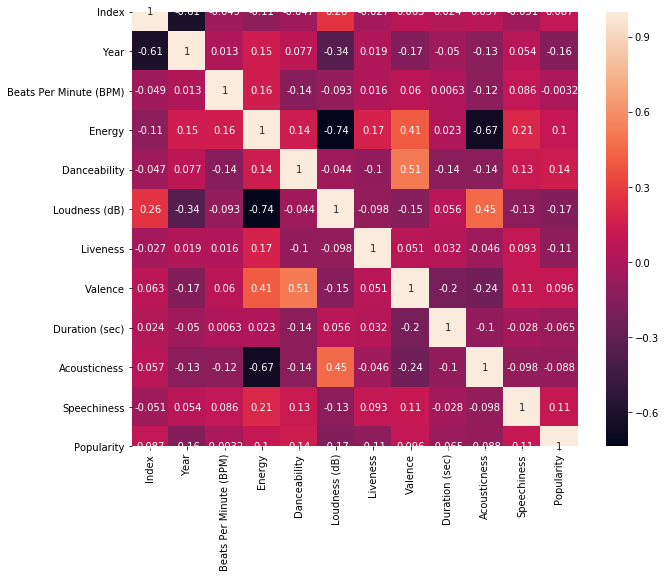

In [24]:
# before we begin visualisation of particular researching, we draw correlation matrix for all data in our analysis
plt.figure(figsize=(10,8))
corrMatrix = top1.corr()
sns.heatmap(corrMatrix, annot = True)

### Most known Artists in the world of all times
* count amount of songs of each artist
* define artists with high marks of popularity in general term
* draw plots

In [25]:
#find most occuring artists
print(top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].count().nlargest(5).reset_index(name='top5 most occurring'))

               Artist  top5 most occurring
0               Queen                   37
1         The Beatles                   36
2            Coldplay                   27
3                  U2                   26
4  The Rolling Stones                   24


Text(0.5, 1.0, 'Amount of songs of Artists')

<Figure size 1080x504 with 0 Axes>

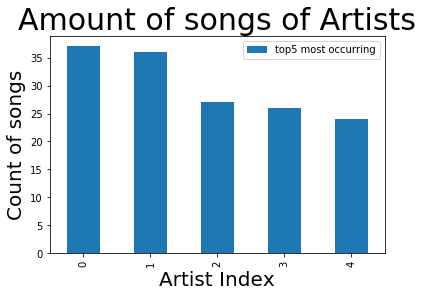

In [26]:
#draw barplot for result
fig = plt.figure(figsize = (15,7))
top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].count().nlargest(5) \
.reset_index(name='top5 most occurring').plot(kind = 'bar')
plt.xlabel('Artist Index', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Amount of songs of Artists', fontsize = 30)

In [27]:
#find top5 popular songs
print(top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].max().nlargest(5).reset_index(name='top5 most popular'))

            Artist  top5 most popular
0      Tones and I                100
1         Maroon 5                 98
2    Billie Eilish                 95
3     Mariah Carey                 95
4  Imagine Dragons                 88


Text(0.5, 1.0, 'Popular song of Artists')

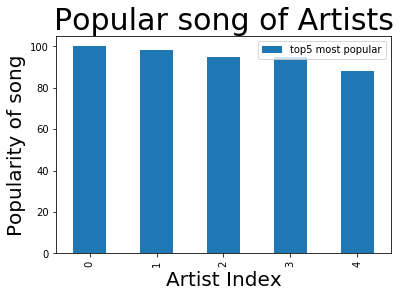

In [28]:
#draw barplot for the result
top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].max().nlargest(5) \
.reset_index(name='top5 most popular').plot(kind = 'bar')
plt.xlabel('Artist Index', fontsize = 20)
plt.ylabel('Popularity of song', fontsize = 20)
plt.title('Popular song of Artists', fontsize = 30)

So, we define that most Artists with most popular songs are Tones and I , Billie Eilish, Imagine Dragons, Maroon 5, Marriah Carey.
And most occurring artists are groups Queen,The Beatles, Coldplay,U2, the Rolling Stones

### Most listened genres of all times
* count amount of songs in each genre
* get genres with high marks of popularity each year  
* plot the results

In [29]:
#Calculating the number of songs of each genre
print(type(top1['Genre']))
popular_genre=top1.groupby('Genre').size()
popular_genre.sort_values(ascending = False)

<class 'pandas.core.series.Series'>


Genre
rock           856
pop            333
standards      123
metal           93
indie           77
              ... 
electronica      1
rap              1
hardcore         1
trance           1
afropop          1
Length: 68, dtype: int64

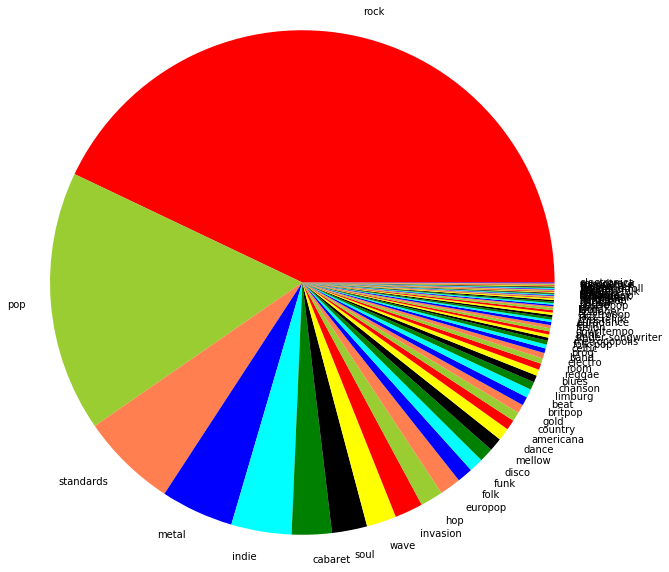

In [30]:
#draw a pieplot for result
labels = top1.Genre.value_counts().index
sizes = top1.Genre.value_counts().values
colors = ['red', 'yellowgreen', 'coral', 'blue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [31]:
#find genres with highest value of popularity
top1.groupby(['Genre']).aggregate({'Popularity' : 'max'}).sort_values('Popularity',ascending = False).head(5)

,Popularity
Genre,
pop,100
electropop,95
rock,88
mellow,86
room,85


Text(0.5, 1.0, 'Popularity of genre')

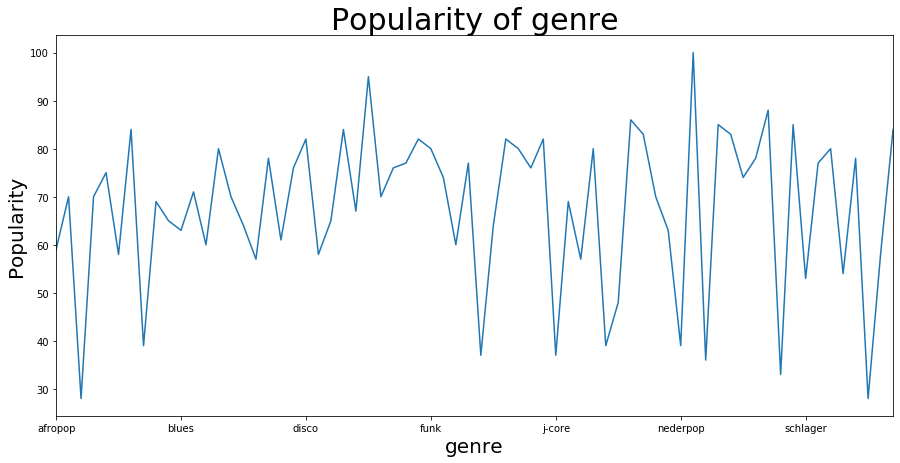

In [32]:
#draw a lineplot for result
fig, ax = plt.subplots(figsize=(15,7))
top1.groupby(['Genre']).max()['Popularity'].plot(ax = ax)
plt.xlabel('genre', fontsize = 20)
plt.ylabel('Popularity', fontsize = 20)
plt.title('Popularity of genre', fontsize = 30)

we researched that most popular genres are pop, rock, electropop,standards,metal,room, mellow

In [33]:
#get data with highest bpm value
top1.loc[: ,'Title':'Beats Per Minute (BPM)'].sort_values('Beats Per Minute (BPM)', ascending = False).head(5)

,Title,Artist,Genre,Year,Beats Per Minute (BPM)
1426,It's The End Of The World As We Know It (And I...,R.E.M.,rock,1987,206
284,Lady Jane - (Original Single Mono Version),The Rolling Stones,rock,2004,205
1808,Road Trippin',Red Hot Chili Peppers,rock,1999,204
1218,Islands In the Stream,Dolly Parton,pop,1982,204
851,What's Going On,Marvin Gaye,soul,1971,203


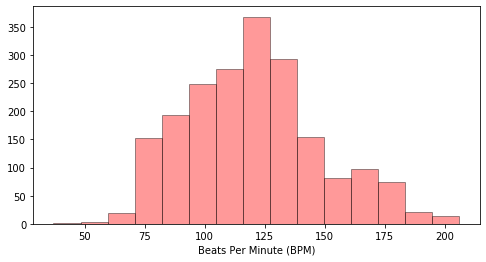

In [34]:
#draw a distribution plot
plt.figure(figsize=(8,4))
sns.distplot(top1['Beats Per Minute (BPM)'], kde=False, bins=15,color='red', hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

In [35]:
#get data with highest energy value
top1.loc[: ,'Title':'Energy'].sort_values('Energy', ascending = False).head(5)

,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy
1345,Angel Of Death,Slayer,metal,1986,90,100
23,Somebody Told Me,The Killers,rock,2004,138,99
1733,Smack My Bitch Up,The Prodigy,beat,1997,136,99
43,American Idiot,Green Day,rock,2004,186,99
1395,Welcome To The Jungle,Guns N' Roses,metal,1987,124,99


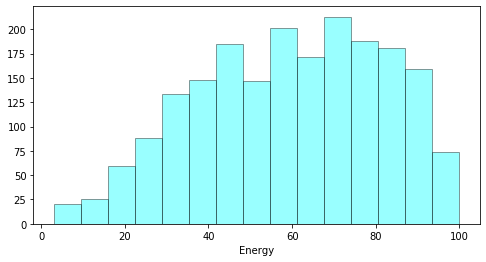

In [36]:
#draw a distribution plot
plt.figure(figsize=(8,4))
sns.distplot(top1['Energy'], kde=False, bins=15,color='aqua', hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

In [37]:
top1.loc[: ,'Title':'Danceability'].sort_values('Danceability', ascending = False).head(5)

,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability
1477,Kingston Town,UB40,fusion,1989,102,25,96
1752,Around the World,Daft Punk,electro,1997,121,80,96
282,Watskeburt?!,De Jeugd Van Tegenwoordig,hop,2008,130,49,95
192,The Real Slim Shady,Eminem,hop,2000,105,66,95
1264,Buffalo Soldier,Bob Marley & The Wailers,reggae,1983,124,46,93


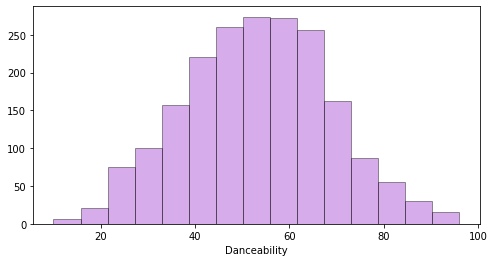

In [38]:
#draw a distribution plot
plt.figure(figsize=(8,4))
sns.distplot(top1['Danceability'], kde=False, bins=15,color='darkorchid', hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

Text(0.5, 1.0, 'Relationship between Years and Energy, Danceability and BPM')

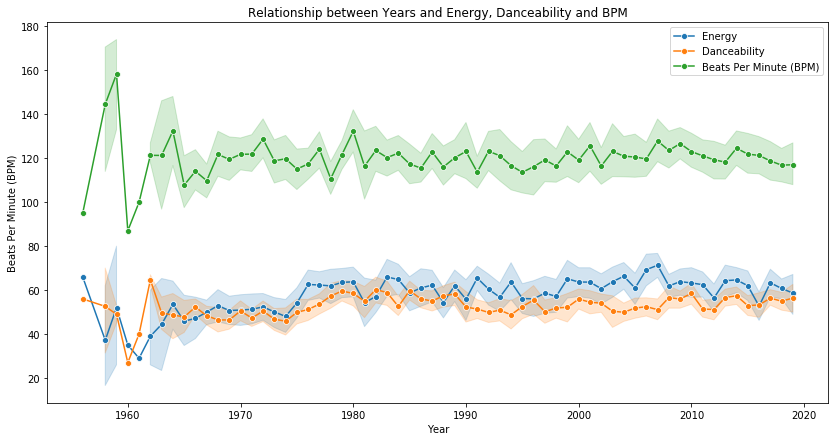

In [39]:
# Analysing the relationship between energy and year
plt.figure(figsize=(14,7))
regplot=sns.lineplot(x="Year",y='Energy',data=top1, label = 'Energy',marker='o')
regplot=sns.lineplot(x="Year",y='Danceability', data=top1, label = 'Danceability', marker='o')
regplot=sns.lineplot(x="Year",y='Beats Per Minute (BPM)',data=top1, label = 'Beats Per Minute (BPM)', marker='o')
regplot.set_title("Relationship between Years and Energy, Danceability and BPM")


found that 
* more energetic songs were listened in period 2000-2010
* more dance songs were listened in period 1970-1980
* more more beat songs were listened in period 1960-1970

In [40]:
top1[['Title','Acousticness','Year']].sort_values('Acousticness').head(5)

,Title,Acousticness,Year
1840,House Of The Rising Sun,0,1964
375,Elevation,0,2000
374,Bad Romance,0,2009
1534,Lithium,0,1991
370,Life in Technicolor ii,0,2008


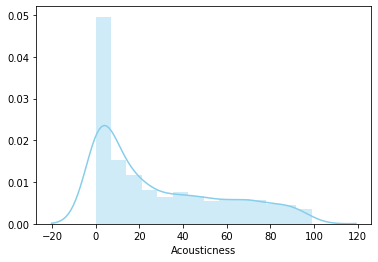

In [41]:
#draw a distplot
sns.distplot( top1['Acousticness'] , color="skyblue")

<Figure size 1152x648 with 0 Axes>

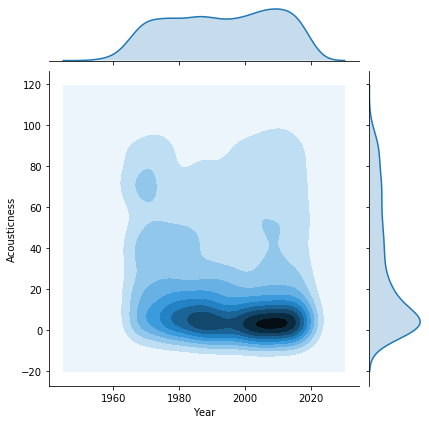

In [42]:
#joinplot for analyzing acousticness
plt.figure(figsize=(16,9))
sns.jointplot(x=top1['Year'], y=top1['Acousticness'], kind="kde")

here we can see that trend to acousticness was less in 2010s than in 1960s